In [297]:
from sklearn.metrics import roc_auc_score
import numpy as np

label = np.array(
    [
        [0,0,1,0],
        [1,0,0,1],
        [0,0,1,0],
        [1,0,0,0],
        [0,1,0,0]
    ]
)

pred = np.array(
    [
        [0.1,0.1,0.7,0.2],
        [0.4,0.1,1,0.9],
        [0.1,0.1,0.8,0.15],
        [0.6,0,0,0.9],
        [0.1,0.4,0.05,0.2]
    ]
)

roc_auc_score(label,pred)+roc_auc_score(label,1-pred)

1.0

In [2]:
import torch
logits = torch.randn((4,16))
label = torch.ones((4,16))

In [8]:
start,end = 0,4
this_logits = torch.max(logits[start:end], dim=0, keepdim=True).values
this_y = torch.max(label[0], dim=0, keepdim=True).values

In [30]:
import pandas as pd
pesudo_df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_label.csv')

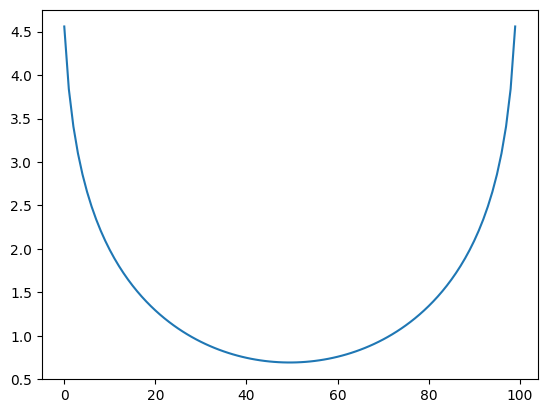

In [37]:
import matplotlib.pyplot as plt
pred = np.linspace(0.01,0.99,100)
plt.plot(-(1-pred)*np.log(pred) - pred*np.log(1-pred))

In [45]:
bird_cols = list(pesudo_df.columns[1:])
entropy_dict = dict(zip(bird_cols,[[] for _ in range(len(bird_cols))]))
pred_dict = dict(zip(bird_cols,[[] for _ in range(len(bird_cols))]))
for col in bird_cols:
    pred = pesudo_df[col]
    entropy = -(1-pred)*np.log(pred) - pred*np.log(1-pred)
    entropy_dict[col].append(entropy)
    pred_dict[col].append(pred)

(array([20976.,  6584.,  1028.,   208.,    85.,    60.,    47.,    66.,
           70.,    54.]),
 array([0.02554989, 0.1019097 , 0.17826951, 0.25462932, 0.33098913,
        0.40734893, 0.48370874, 0.56006855, 0.63642836, 0.71278817,
        0.78914797]),
 <BarContainer object of 10 artists>)

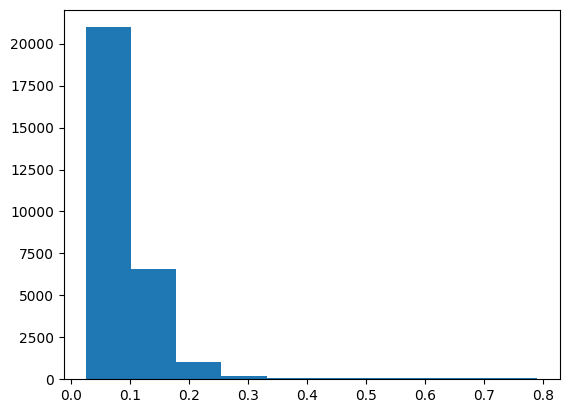

In [52]:
plt.hist(pred_dict['blbgra1'])

In [53]:
pred_pesudo = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv3.csv')

In [75]:
bird_cols = pred_pesudo.columns[:-2]
pred1_sum = (pred_pesudo[bird_cols]>0.7).sum()

In [85]:
LowClasses = ['1462737', '787625', '65547', '126247', '555142', '24272', '1564122', 'plctan1', '65336', '1346504', '548639', '476538', '963335', '66893', '714022', '46010', '134933', '1192948', '868458', '523060', '65419', '1194042', '1462711', '24292', '66531', '21116', '66578', '42113', '21038', '47067', '66016', '528041', '476537', '67082', '64862', '81930', '41778', '42087', '1139490']

In [83]:
pred_lowClasses = list(pred1_sum[pred1_sum==0].index)

In [91]:
print(list((set(LowClasses) & set(pred_lowClasses))))

['47067', '523060', '42113', '1192948', '1139490', '21038', '65419', 'plctan1', '963335', '81930', '126247', '1462737', '42087', '1462711', '66016', '528041', '1346504', '24292', '134933', '66531', '67082', '1564122', '66893', '46010', '24272', '66578', '476538', '1194042', '65336', '868458']


In [92]:
len(list((set(LowClasses) & set(pred_lowClasses))))

30

In [287]:
valid_res = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/logs/2025-03-28T10:17/valid.csv')

In [155]:
all_df = pd.read_csv('/root/projects/BirdClef2025/data/train.csv')
classes_cnt = all_df['primary_label'].value_counts()

In [123]:
classes_cnt[classes_cnt<5].shape

(23,)

In [131]:
LowClasses = ['47067', '523060', '42113', '1192948', '1139490', '21038', '65419', 'plctan1', '963335', '81930', '126247', '1462737', '42087', '1462711', '66016', '528041', '1346504', '24292', '134933', '66531', '67082', '1564122', '66893', '46010', '24272', '66578', '476538', '1194042', '65336', '868458']

In [290]:
last_res = valid_res.iloc[-1][:-1]
error_classes = list(last_res.sort_values()[:10].index)

In [292]:
last_res.sort_values()[:10].index

Index(['21038', '476537', '24292', '66016', '555142', '21116', '66531',
       '65419', '1139490', '66578'],
      dtype='object')

In [305]:
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv3.csv')

In [265]:
birds_cols = df.columns[1:-1]
pred_prob = df[bird_cols]
max_prob = pred_prob.max(axis=1)
exist_bird = df[max_prob>0.95]

In [349]:
soundscape_name = 'H09_20230512_064500'
max_index = df[df['filename']==soundscape_name][bird_cols].iloc[0].argmax()
print(df[df['filename']==soundscape_name][bird_cols].iloc[0].max())
bird_cols[max_index]

0.7212293744087219


'yectyr1'

In [236]:
# exist_bird[birds_cols] = 0
# exist_bird.to_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/soundscapes_nocall.csv',index=False)

/tmp/ipykernel_3241502/104903361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exist_bird[birds_cols] = 0


In [286]:
show_idx = 103
max_prob_class = birds_cols[exist_bird.iloc[show_idx][birds_cols].argmax()]
max_prob = exist_bird.iloc[show_idx][birds_cols].max()
filename = df.iloc[show_idx]['row_id']
print(f'max prob species:{max_prob_class}')
print(f'prob:{max_prob}')
print(f'filename:{filename}')
exist_bird.iloc[show_idx][birds_cols].sort_values(ascending=False)

max prob species:22976
prob:0.9751617908477784
filename:H90_20230515_215000_20


22976      0.975162
476538     0.042435
laufal1     0.01587
126247     0.014682
speowl1    0.004519
             ...   
blchaw1    0.000001
yehbla2    0.000001
1564122    0.000001
22333      0.000001
amakin1         0.0
Name: 10784, Length: 206, dtype: object

In [18]:
import torch
split2input2 = torch.linspace(torch.tensor(0.001),torch.tensor(0.999),steps=1000).reshape(-1,1,1)
split2targets = torch.tensor([1]).reshape(1,1)
res1 = []
res2 = []
for i in range(split2input2.shape[0]):
    this_input = split2input2[i,...]
    res1.append(-torch.mean(split2targets*torch.log(this_input)*((1-this_input)**2) + 
                            (1-split2targets)*torch.log(1-this_input)*(this_input**2),dim=(0,1)).item())
    
    res2.append(-torch.mean(split2targets*torch.log(this_input) + 
                            (1-split2targets)*torch.log(1-this_input),dim=(0,1)).item())

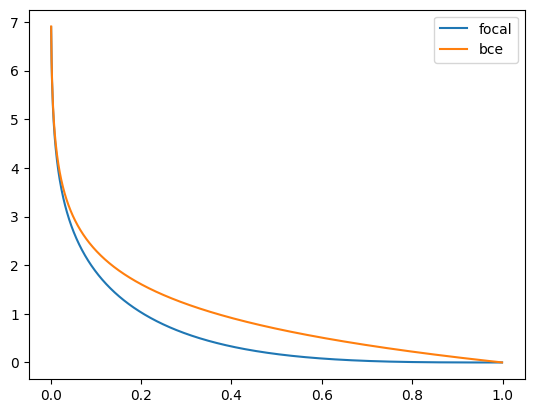

In [23]:
import matplotlib.pyplot as plt
plt.plot(split2input2.detach().cpu().numpy()[:,0,0],res1,label='focal')
plt.plot(split2input2.detach().cpu().numpy()[:,0,0],res2,label='bce')
plt.legend()

In [31]:
import pandas as pd
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/train.csv')
print(list(df['primary_label'].value_counts()[df['primary_label'].value_counts()<5].index))

['134933', '1192948', '868458', '523060', '65419', '1194042', '1462711', '24292', '66531', '21116', '66578', '42113', '21038', '47067', '66016', '528041', '476537', '67082', '64862', '81930', '41778', '42087', '1139490']


['http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-36385/IAvH-CSA-36385.mp3', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-36389/IAvH-CSA-36389.mp3', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-36358/IAvH-CSA-36358.mp3', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-36366/IAvH-CSA-36366.mp3', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-36373/IAvH-CSA-36373.mp3', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-36388/IAvH-CSA-36388.mp3', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-18783/IAvH-CSA-18783.mp3', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-18794/IAvH-CSA-18794.mp3', 'http://colecciones.humboldt.org.co/rec/sonidos/IAvH-CSA-18802/IAvH-CSA-18802.mp3', 'https://xeno-canto.org/941297', 'https://static.inaturalist.org/sounds/1109254.wav', 'https://static.inaturalist.org/sounds/146584.mp3', 'https://static.inaturalist.org/sounds/320679.m4a', 'https://static.inaturalist.org/sounds/888527.m4a', '

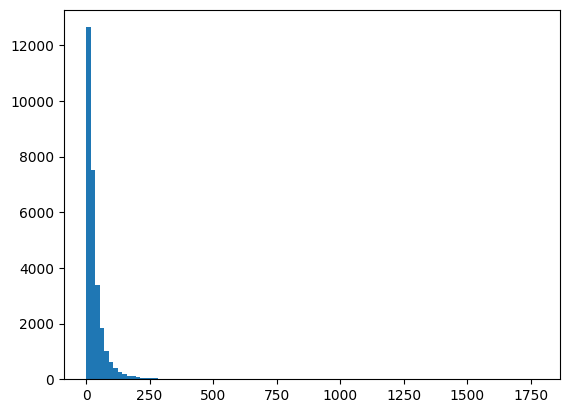

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf

df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/train_duration.csv')
plt.hist(df['duration'],bins=100)
print(list(df['url']))

In [38]:
df['duration'].describe()

count    28564.000000
mean        35.352460
std         50.605647
min          0.544594
25%         10.579445
50%         20.976312
75%         41.300031
max       1774.392000
Name: duration, dtype: float64

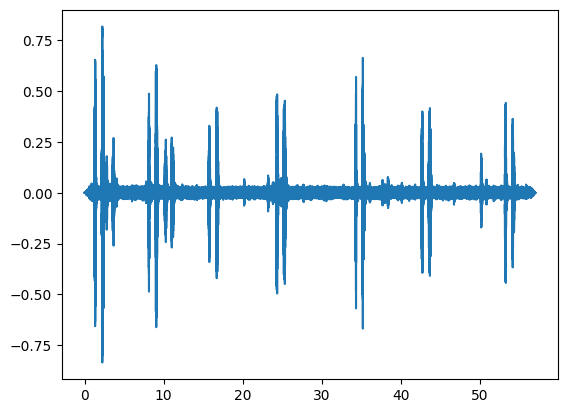

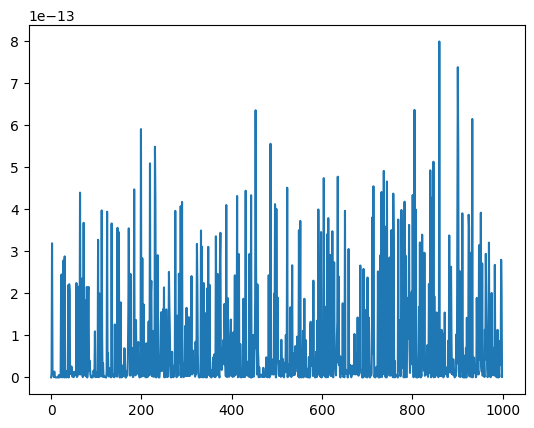

In [32]:
demodata = '/root/projects/BirdClef2025/data/train_audio/chbant1/XC818569.ogg'
wave,sr = sf.read(demodata)
plt.figure()
plt.plot(np.arange(0,len(wave)/sr,1/sr),wave)
total_power = np.sum(np.abs(wave)**2)
sample_prob = wave**2/total_power
plt.figure()
plt.plot(sample_prob[0:1000])

In [49]:
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv12_ensemble.csv')
# filter night time

time = df['path'].apply(lambda x: int(x.split('_')[-2][0:2]))
is_night = time.apply(lambda x: 1 if x>=20 or x<5 else 0)
df = df[is_night==0]

In [ ]:
import pandas as pd
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv11_ensemble.csv')
# filter night time

time = df['path'].apply(lambda x: int(x.split('_')[-2][0:2]))
is_night = time.apply(lambda x: 1 if x>=20 or x<5 else 0)
df = df[is_night==0]
bird_cols = df.columns[1:]
df['filename'] = df['path'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[:-1]))
# 对于同一组filename, 保留它们的argmax都一致的组
consistent = []
for idx,row in df.groupby('filename'):
    res = row[bird_cols].idxmax(axis=1)
    if len(res.unique())==1:
        consistent.append(idx)
df = df[df['filename'].isin(consistent)]
df = df.reset_index(drop=True)

df_modified = df.copy()
row_max_idx = df[bird_cols].idxmax(axis=1)  # 找到每一行最大值所在的列

for i, col in enumerate(row_max_idx):
    df_modified.at[i, col] = 1
df = df_modified
df = df.drop(columns=['filename'])
df.to_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv13_ensemble.csv',index=False)

In [ ]:
import torch
pred = torch.softmax(torch.randn((4,50,16)),dim=-1)
label = torch.ones((4,50))
label[0,0] = 0
label[0,1] = 2
label[0,2] = 3
loss = torch.nn.CrossEntropyLoss()
out = loss(pred,label.long())

In [66]:
import pickle
from copy import deepcopy
import numpy as np

with open('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/speech_timestamps.pkl','rb') as f:
    data = pickle.load(f)

In [71]:
data

{'CSA36385.ogg': array([ 291200,  291201,  291202, ..., 3164797, 3164798, 3164799]),
 'CSA36389.ogg': array([ 316800,  316801,  316802, ..., 3091197, 3091198, 3091199]),
 'CSA36358.ogg': array([ 310400,  310401,  310402, ..., 3731197, 3731198, 3731199]),
 'CSA36366.ogg': array([ 313600,  313601,  313602, ..., 3375997, 3375998, 3375999]),
 'CSA36373.ogg': array([ 310400,  310401,  310402, ..., 3318397, 3318398, 3318399]),
 'CSA36388.ogg': array([ 310400,  310401,  310402, ..., 3075197, 3075198, 3075199]),
 'CSA18783.ogg': array([ 873600,  873601,  873602, ..., 1033596, 1033597, 1033598]),
 'CSA18794.ogg': array([ 28800,  28801,  28802, ..., 431997, 431998, 431999]),
 'CSA18802.ogg': array([ 553600,  553601,  553602, ..., 1471997, 1471998, 1471999]),
 'XC941297.ogg': array([ 51200,  51201,  51202, ..., 140797, 140798, 140799]),
 'iNat1109254.ogg': array([ 51200,  51201,  51202, ..., 140797, 140798, 140799]),
 'iNat146584.ogg': array([    0,     1,     2, ..., 35197, 35198, 35199]),
 'CSA

In [69]:
for key,value in deepcopy(data).items():
    data_numpy = data.pop(key)
    data_numpy = np.concatenate([np.arange(int(i['start']*32000),int(i['end']*32000)) for i in data_numpy])
    data[key.split('/')[-1]] = data_numpy

In [70]:
data['XC882881.ogg']

array([ 998400,  998401,  998402, ..., 1452797, 1452798, 1452799])

In [62]:
with open('/root/projects/BirdClef2025/data/train_voice_data_numpy.pkl','wb') as f:
    pickle.dump(data,f)

In [12]:
import pandas as pd
import numpy as np

df_pred = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pred_df.csv').drop('Unnamed: 0',axis=1)
df_gt = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/gt_df.csv').drop('Unnamed: 0',axis=1)
cols = [col for col in df_gt.columns if col!='path']
argindex_pred = df_pred[cols].aggregate(np.argmax,axis=1)
argindex_gt = df_gt[cols].aggregate(np.argmax,axis=1)

In [13]:
df_pred

,1139490,1192948,1194042,126247,1346504,134933,135045,1462711,1462737,1564122,...,yebsee1,yecspi2,yectyr1,yehbla2,yehcar1,yelori1,yeofly1,yercac1,ywcpar,path
0,0.737948,0.035210,0.000069,0.000043,0.004440,0.000854,0.000077,0.234292,0.133091,0.000443,...,0.000039,0.000044,0.000020,0.000001,0.000118,0.000033,0.000135,0.000090,0.000045,/root/projects/BirdClef2025/data/train_audio/1...
1,0.748949,0.002769,0.000271,0.000009,0.007065,0.000327,0.000174,0.014098,0.003500,0.000565,...,0.000078,0.000781,0.000021,0.000001,0.000271,0.000005,0.000863,0.000069,0.001115,/root/projects/BirdClef2025/data/train_audio/1...
2,0.000828,0.783136,0.000162,0.000053,0.000424,0.000444,0.000048,0.000989,0.001968,0.000167,...,0.000137,0.000247,0.000060,0.000004,0.000040,0.000041,0.001272,0.000322,0.000096,/root/projects/BirdClef2025/data/train_audio/1...
3,0.003644,0.812162,0.000252,0.000061,0.000395,0.000352,0.000051,0.004103,0.005347,0.000142,...,0.000170,0.000350,0.000058,0.000006,0.000099,0.000045,0.000961,0.000344,0.000086,/root/projects/BirdClef2025/data/train_audio/1...
4,0.001676,0.783185,0.000266,0.000134,0.000228,0.000286,0.000051,0.006089,0.005859,0.000208,...,0.000342,0.000808,0.000096,0.000014,0.000096,0.000081,0.000861,0.000503,0.000153,/root/projects/BirdClef2025/data/train_audio/1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28559,0.000034,0.000051,0.000175,0.000073,0.000139,0.000029,0.000105,0.000073,0.000036,0.000020,...,0.000533,0.000740,0.001977,0.000036,0.000653,0.000082,0.004254,0.007841,0.317761,/root/projects/BirdClef2025/data/train_audio/y...
28560,0.000033,0.000055,0.000041,0.000022,0.000034,0.000035,0.000124,0.000129,0.000154,0.000021,...,0.001790,0.002345,0.000122,0.000145,0.001713,0.000067,0.001711,0.000809,0.749372,/root/projects/BirdClef2025/data/train_audio/y...
28561,0.000166,0.000225,0.000314,0.000093,0.000173,0.000052,0.000181,0.000645,0.000400,0.000025,...,0.000791,0.001657,0.000987,0.000045,0.002806,0.000409,0.001348,0.004739,0.658930,/root/projects/BirdClef2025/data/train_audio/y...
28562,0.000066,0.000100,0.000087,0.000088,0.000106,0.000056,0.000053,0.000124,0.000068,0.000024,...,0.000460,0.001422,0.000487,0.000073,0.000822,0.000064,0.001109,0.000902,0.667851,/root/projects/BirdClef2025/data/train_audio/y...


In [14]:
df_gt

,1139490,1192948,1194042,126247,1346504,134933,135045,1462711,1462737,1564122,...,yebsee1,yecspi2,yectyr1,yehbla2,yehcar1,yelori1,yeofly1,yercac1,ywcpar,path
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/projects/BirdClef2025/data/train_audio/1...
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/projects/BirdClef2025/data/train_audio/1...
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/projects/BirdClef2025/data/train_audio/1...
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/projects/BirdClef2025/data/train_audio/1...
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/projects/BirdClef2025/data/train_audio/1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/projects/BirdClef2025/data/train_audio/y...
28560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/projects/BirdClef2025/data/train_audio/y...
28561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/projects/BirdClef2025/data/train_audio/y...
28562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/projects/BirdClef2025/data/train_audio/y...


In [15]:
pred_array = np.array(df_pred[cols])
gt_array = np.array(df_gt[cols])
pred_array[np.where(gt_array)].shape

(32505,)

In [16]:
error_pred = (np.abs(pred_array - gt_array) > 0.5) & (pred_array < 0.5)
error_fileidx = np.unique(np.where(error_pred)[0])

In [17]:
error_fileidx

array([    9,    25,    27, ..., 28551, 28555, 28559])

In [18]:
import soundfile as sf
from tqdm import tqdm

filter_error_index = []
for i in tqdm(list(error_fileidx),total=len(error_fileidx)):
    audio,_ = sf.read(df_pred['path'].iloc[i])
    duration = len(audio)/32000
    if duration <= 10:
        filter_error_index.append(i) 

100%|██████████| 6919/6919 [04:03<00:00, 28.39it/s]


In [21]:
train_df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/train.csv')
# filter_train_df = train_df.drop(filter_error_index)
train_df.iloc[filter_error_index]

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
68,21211,[''],[''],21211/XC896828.ogg,XC,2.0,https://xeno-canto.org/896828,3.9871,-52.5875,Allobates femoralis,Spotted-thighed Poison Frog,Delaitre guillaume,cc-by-nc-sa 4.0
74,21211,[''],[''],21211/XC896857.ogg,XC,3.0,https://xeno-canto.org/896857,3.9871,-52.5875,Allobates femoralis,Spotted-thighed Poison Frog,Delaitre guillaume,cc-by-nc-sa 4.0
76,21211,[''],[''],21211/XC896861.ogg,XC,2.0,https://xeno-canto.org/896861,3.9871,-52.5875,Allobates femoralis,Spotted-thighed Poison Frog,Delaitre guillaume,cc-by-nc-sa 4.0
83,21211,[''],[''],21211/XC913858.ogg,XC,3.0,https://xeno-canto.org/913858,4.0891,-52.6816,Allobates femoralis,Spotted-thighed Poison Frog,Delaitre guillaume,cc-by-nc-sa 4.0
103,21211,[''],[''],21211/XC917465.ogg,XC,2.0,https://xeno-canto.org/917465,4.0889,-52.6742,Allobates femoralis,Spotted-thighed Poison Frog,Delaitre guillaume,cc-by-nc-sa 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28412,yercac1,[''],[''],yercac1/iNat1215365.ogg,iNat,0.0,https://static.inaturalist.org/sounds/1215365.wav,-2.9592,-60.7381,Cacicus cela,Yellow-rumped Cacique,Unknown,cc-by-nc 4.0
28416,yercac1,[''],[''],yercac1/iNat337814.ogg,iNat,0.0,https://static.inaturalist.org/sounds/337814.m4a,9.4478,-70.3618,Cacicus cela,Yellow-rumped Cacique,Damaris Rojas,cc-by-nc 4.0
28534,ywcpar,[''],['flight call'],ywcpar/XC939157.ogg,XC,2.0,https://xeno-canto.org/939157,3.6867,-61.0326,Amazona ochrocephala,Yellow-crowned Parrot,JAYRSON ARAUJO DE OLIVEIRA,cc-by-nc-sa 4.0
28546,ywcpar,[''],[''],ywcpar/iNat267843.ogg,iNat,0.0,https://static.inaturalist.org/sounds/267843.wav,9.2445,-70.3805,Amazona ochrocephala,Yellow-crowned Parrot,Henrry,cc-by 4.0


In [168]:
filter_train_df.to_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/filter_noise_train.csv')

In [ ]:
from joblib import Parallel,delayed
from tqdm import tqdm_notebook
import os

train_df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/train.csv')
root_path = '/root/projects/BirdClef2025/data/train_audio/'
target_path = '/root/projects/BirdClef2025/data/rms_prob/'

def save_rms_prob(row):
    audio,sr = sf.read(root_path + row['filename'])

    split_signal = np.array_split(audio,len(audio)//(sr//2))
    rms_power = np.array([np.sqrt(np.mean(np.power(i,2))) for i in split_signal])
    prob = rms_power/rms_power.sum()
    np.save(target_path+row['filename'].replace('/','_').replace('.ogg','.npy'),prob)
# save_rms_prob(train_df.iloc[0])
for idx,row in tqdm_notebook(train_df.iterrows(),total=len(train_df)):
    save_rms_prob(row)
# Parallel(n_jobs=16)(delayed(save_rms_prob)(row) for idx,row in tqdm(train_df.iterrows(),total = len(train_df)))

/tmp/ipykernel_320856/2838870904.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx,row in tqdm_notebook(train_df.iterrows(),total=len(train_df)):


  0%|          | 0/28564 [00:00<?, ?it/s]

In [102]:
import pandas as pd
import numpy as np

pesudo_df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv20_ensemble.csv')
bird_cols = list(pesudo_df.columns[1:])
pred_pesudo = pesudo_df[bird_cols].values
pred_pesudo[pred_pesudo>0.4] = 1
pred_pesudo[pred_pesudo<0.2] = 0
pred_pesudo[(pred_pesudo>0.2) & (pred_pesudo<0.4)] = -5
pesudo_df[bird_cols] = pred_pesudo.astype(np.int32)

In [103]:
pesudo_df.to_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv20_mask0-2-0-4thred.csv',index=False)

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv16_0.4thred.csv')
bird_cols = list(df.columns[1:])

In [83]:
import pandas as pd
import numpy as np

pred_df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv19_uc_filtered.csv')
birds_cols = list(pred_df.columns[1:])
pred_df[birds_cols] = (pred_df[birds_cols]>0.7).astype(np.int32)

In [90]:
pred_df['path'].iloc[pred_df[birds_cols].sum(axis=1).argmax()]

'/root/projects/BirdClef2025/data/train_soundscapes_10s_sw_0s/H10_20230507_162000_10s.ogg'

In [84]:
pred_df.to_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv19_0.7thred.csv',index=False)

<BarContainer object of 206 artists>

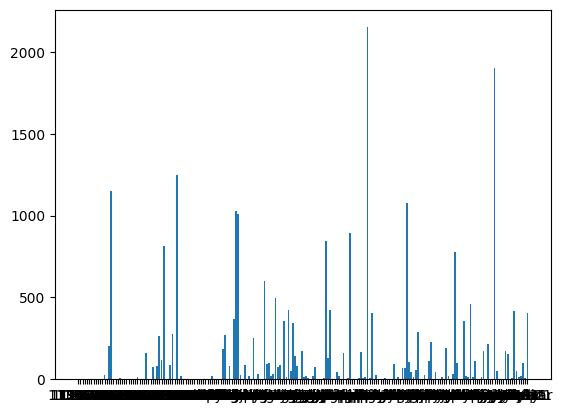

In [ ]:
plt.bar(pred_df[birds_cols].sum().to_dict())

In [ ]:
pred_df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv17_ensemble_smooth.csv')

(206,)

In [ ]:
sorted(pred_df[birds_cols].values[98])

In [49]:
import pickle
with open('/root/projects/BirdClef2025/data/train_voice_data_numpy.pkl','rb') as f:
    hv_record = pickle.load(f)

In [53]:
hv_record['CSA18795.ogg']

array([ 435200,  435201,  435202, ..., 4229181, 4229182, 4229183])

In [ ]:
# all noise: 1139490 1192948 1462711 1462737 963335
# all noise and too short: 1564122
# all noise but not confident: 528041

In [ ]:
import pandas as pd
import numpy as np
bvc_pred = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv19_uc_filtered.csv').drop('Unnamed: 0',axis=1)
bird_cols = bvc_pred.columns[:-1].to_list()
bvc_pred[bird_cols] = (bvc_pred[bird_cols]>0.3).astype(np.int32)

In [15]:
bvc_pred.to_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_label_bvc10_thred0.2.csv',index=False)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
images1 = np.load('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/image_batch1.npy')
images2 = np.load('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/image_batch2.npy')
images3 = np.load('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/image_batch3.npy')

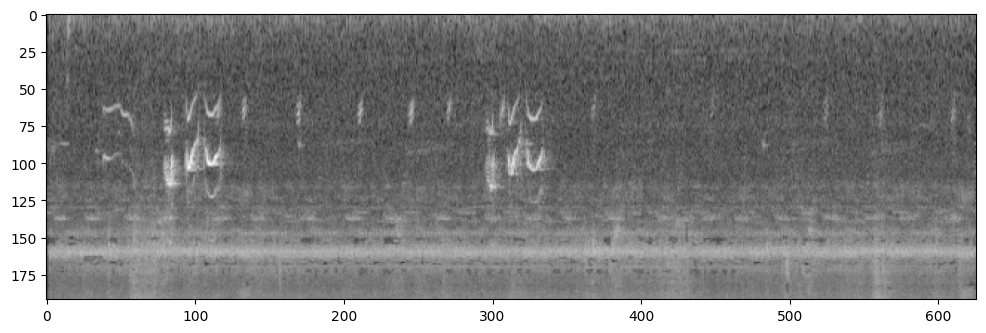

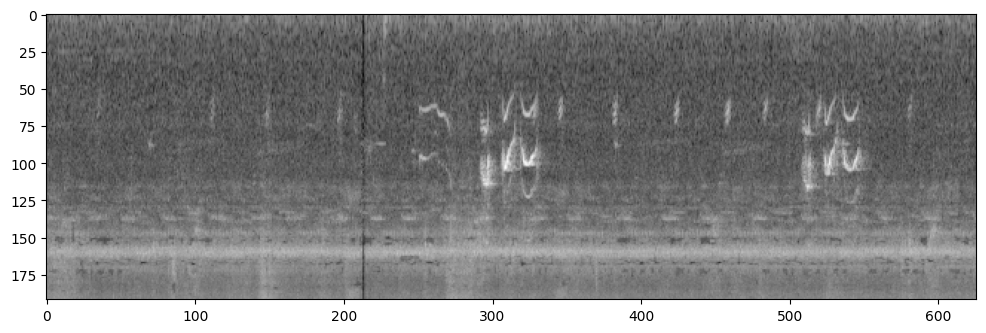

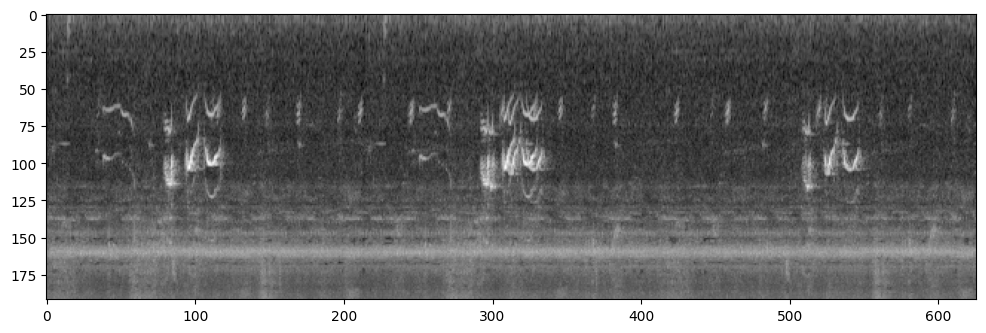

In [70]:
show_idx = 34
roll_value = 50
plt.figure(figsize=(12,6))
plt.imshow(images1[show_idx,0,:,:].transpose(1,0),cmap='gray')
plt.figure(figsize=(12,6))
plt.imshow(images2[show_idx,0,:,:].transpose(1,0),cmap='gray')
plt.figure(figsize=(12,6))
plt.imshow(images3[show_idx,0,:,:].transpose(1,0) ,cmap='gray')

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/usefulFunc/pesudo_labelv16_0.4thred_mask0-2-0-4.csv')
bird_cols = df.columns[1:]